# Homework 1
- Tommaso Bertola 2086990
- Giacomo Di Prima 2086992
- Giuseppe Viterbo 2086516
- Marzo Zenari 2097012

In [1]:
#DNN library
import tensorflow as tf
import keras, sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout

#common libraries
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rc('image', cmap='copper') #global colormap 

#random seed
seed=1
np.random.seed(seed) # fix random seed

2023-03-06 22:04:19.565139: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
%run nonlinear_function.py #here is loaded the filename, to be run only once

In [3]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(f'Dimension of a sample{L}')

#training percentage
perc_train = 0.8


N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

Dimension of a sample2
data: 4000
train: 3200


In [4]:
### Split training and test data
(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [5]:
### Rescale input data

def Rescale(x):
    return x/50 #the number goes from -50 to 50, so we put them between -1 and 1 to use the non linearity 

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow

In [6]:
def create_DNN(act_func, neurons): 
    CASE=1
    
    if CASE==1:
        model = Sequential() #empty template of the neural network
        model.add(Dense(L,input_shape=(L,),activation=act_func)) #add a layer dense (all connection) with a ReLu 2 neuron for 2 x_i
        model.add(Dense(units=neurons,activation=act_func))
        model.add(Dense(units=neurons,activation=act_func))
        model.add(Dense(units=neurons,activation=act_func))
        model.add(Dropout(0.2)) #it is applied to the last layer, need to be reader in keras documentation 
        model.add(Dense(1,activation='sigmoid'))
        #nepoch=400
    # as case 1 but one layer shorter
    if CASE==2:
        model = Sequential()
        model.add(Dense(L,input_shape=(L,),activation=act_func))
        model.add(Dense(units=neurons,activation=act_func))
        model.add(Dense(units=neurons,activation=act_func))
        model.add(Dropout(0.2))
        model.add(Dense(1,activation='sigmoid'))
        #nepoch=400
    
    return model 

### Optimization method and cost function

In [7]:
def compile_model(optimizer='adam', act_func='relu', neurons=20):
    model = create_DNN(act_func, neurons)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])    
    return model

## EX.1 Modify the Hyperparameters to Optimize Performance of the Model

In [8]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [13]:
# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adam', 'Adamax']
act_func = ['sigmoid','tanh', 'ReLU', 'ELU']
batch_size = [10, 20, 30]
neurons =[10, 20, 30]
nepochs = 8

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(model=compile_model, 
                        epochs=nepochs, 
                        batch_size=batch_size, 
                        verbose=1,
                        act_func=act_func,
                        model__neurons=neurons)

# define parameter dictionary
param_grid = dict(optimizer=optimizer,
                  act_func=act_func,
                  batch_size=batch_size,
                  model__neurons=neurons)

print(param_grid)


# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4)

{'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adam', 'Adamax'], 'act_func': ['sigmoid', 'tanh', 'ReLU', 'ELU'], 'batch_size': [10, 20, 30], 'model__neurons': [10, 20, 30]}


In [14]:
grid

GridSearchCV(cv=4,
             estimator=KerasClassifier(act_func=['sigmoid', 'tanh', 'ReLU', 'ELU'], batch_size=[10, 20, 30], epochs=8, model=<function compile_model at 0x7f0fd6da3be0>, model__neurons=[10, 20, 30]),
             n_jobs=-1,
             param_grid={'act_func': ['sigmoid', 'tanh', 'ReLU', 'ELU'],
                         'batch_size': [10, 20, 30],
                         'model__neurons': [10, 20, 30],
                         'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adam',
                                       'Adamax']})

In [15]:
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/8
Epoch 1/8
Epoch 1/8
Epoch 1/8
240/240 [==============================] - 3s 5ms/step - loss: 0.7245 - accuracy: 0.5188
Epoch 2/8
Epoch 2/8
240/240 [==============================] - 3s 5ms/step - loss: 0.7094 - accuracy: 0.4796
Epoch 2/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6978 - accuracy: 0.5242
Epoch 3/8
240/240 [==============================] - 1s 5ms/step - loss: 0.7079 - accuracy: 0.4967
Epoch 3/8
240/240 [==============================] - 1s 5ms/step - loss: 0.7033 - accuracy: 0.4996
Epoch 3/8
240/240 [==============================] - 1s 5ms/step - loss: 0.7063 - accuracy: 0.4979
Epoch 3/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6985 - accuracy: 0.5050
Epoch 4/8
240/240 [==============================] - 1s 5ms/step - loss: 0.7080 - accuracy: 0.4963
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6999 - accuracy: 0.4992
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - lo

240/240 [==============================] - 1s 3ms/step - loss: 0.6971 - accuracy: 0.5029
Epoch 5/8
240/240 [==============================] - 1s 3ms/step - loss: 0.7012 - accuracy: 0.5013
Epoch 3/8
240/240 [==============================] - 1s 3ms/step - loss: 0.7025 - accuracy: 0.5046
Epoch 3/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6968 - accuracy: 0.4967
Epoch 6/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6985 - accuracy: 0.4892
Epoch 4/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6992 - accuracy: 0.4954
Epoch 4/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6982 - accuracy: 0.5071
Epoch 5/8
240/240 [==============================] - 2s 3ms/step - loss: 0.7024 - accuracy: 0.4925
Epoch 2/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5117
Epoch 8/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6959 - accuracy: 0.5113
Epoch 6/8
240/240 [=

240/240 [==============================] - 1s 3ms/step - loss: 0.6951 - accuracy: 0.5175
Epoch 5/8
240/240 [==============================] - 2s 3ms/step - loss: 0.7103 - accuracy: 0.4854
Epoch 2/8
240/240 [==============================] - 2s 3ms/step - loss: 0.7181 - accuracy: 0.4938
Epoch 2/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6969 - accuracy: 0.5042
Epoch 6/8
240/240 [==============================] - 1s 3ms/step - loss: 0.7035 - accuracy: 0.5071
Epoch 3/8
240/240 [==============================] - 1s 3ms/step - loss: 0.7122 - accuracy: 0.4975
Epoch 3/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6989 - accuracy: 0.4833
Epoch 7/8
240/240 [==============================] - 1s 3ms/step - loss: 0.7015 - accuracy: 0.5021
Epoch 4/8
240/240 [==============================] - 2s 3ms/step - loss: 0.7012 - accuracy: 0.5017
Epoch 2/8
240/240 [==============================] - 1s 3ms/step - loss: 0.7092 - accuracy: 0.4938
Epoch 4/8
240/240 [=

240/240 [==============================] - 2s 3ms/step - loss: 0.7082 - accuracy: 0.5017
Epoch 2/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6715 - accuracy: 0.6021
Epoch 7/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6995 - accuracy: 0.5138
Epoch 4/8
240/240 [==============================] - 1s 3ms/step - loss: 0.7033 - accuracy: 0.5029
Epoch 3/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6414 - accuracy: 0.6567
Epoch 8/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6985 - accuracy: 0.5092
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5980 - accuracy: 0.6975
Epoch 1/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6953 - accuracy: 0.5117
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6967 - accuracy: 0.5075
Epoch 5/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6868 - accuracy: 0.5387
Epoch 7/8
240/240 [=

240/240 [==============================] - 2s 4ms/step - loss: 0.7026 - accuracy: 0.5171
Epoch 2/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6994 - accuracy: 0.5100
Epoch 5/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6888 - accuracy: 0.5400
Epoch 7/8
240/240 [==============================] - 1s 5ms/step - loss: 0.7040 - accuracy: 0.5058
Epoch 3/8
240/240 [==============================] - 2s 4ms/step - loss: 0.6998 - accuracy: 0.5167
Epoch 2/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6961 - accuracy: 0.5050
Epoch 6/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6830 - accuracy: 0.5621
Epoch 8/8
240/240 [==============================] - 1s 4ms/step - loss: 0.7023 - accuracy: 0.4975
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6985 - accuracy: 0.5108
Epoch 3/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6949 - accuracy: 0.5208
Epoch 7/8
240/240 [=

240/240 [==============================] - 1s 5ms/step - loss: 0.6902 - accuracy: 0.5425
Epoch 4/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6922 - accuracy: 0.5229
Epoch 5/8
240/240 [==============================] - 1s 5ms/step - loss: 0.7077 - accuracy: 0.4946
Epoch 3/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6972 - accuracy: 0.5192
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6913 - accuracy: 0.5333
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6641 - accuracy: 0.6129
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6947 - accuracy: 0.5258
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6767 - accuracy: 0.5833
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6263 - accuracy: 0.6733
Epoch 7/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6973 - accuracy: 0.5079
Epoch 5/8
240/240 [=

240/240 [==============================] - 1s 4ms/step - loss: 0.6882 - accuracy: 0.5379
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.5288
Epoch 5/8
240/240 [==============================] - 1s 5ms/step - loss: 0.7001 - accuracy: 0.4988
Epoch 3/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6714 - accuracy: 0.6000
Epoch 7/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6860 - accuracy: 0.5479
Epoch 6/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6879 - accuracy: 0.5362
Epoch 7/8
240/240 [==============================] - 1s 5ms/step - loss: 0.7041 - accuracy: 0.4900
Epoch 4/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6233 - accuracy: 0.6779
Epoch 8/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6657 - accuracy: 0.6054
Epoch 7/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6745 - accuracy: 0.5854
Epoch 8/8
240/240 [=

240/240 [==============================] - 1s 5ms/step - loss: 0.6690 - accuracy: 0.6046
Epoch 7/8
240/240 [==============================] - 3s 5ms/step - loss: 0.7080 - accuracy: 0.5063
Epoch 2/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6355 - accuracy: 0.6625
Epoch 7/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6955 - accuracy: 0.5163
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6024 - accuracy: 0.6938
Epoch 8/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6973 - accuracy: 0.5013
Epoch 7/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6951 - accuracy: 0.5271
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6871 - accuracy: 0.5446
Epoch 8/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6993 - accuracy: 0.5008
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6856 - accuracy: 0.5479
Epoch 6/8
120/120 [=

120/120 [==============================] - 2s 3ms/step - loss: 0.7229 - accuracy: 0.4787
Epoch 2/8
120/120 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.5117
Epoch 3/8
120/120 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.5129
Epoch 4/8
120/120 [==============================] - 2s 3ms/step - loss: 0.7105 - accuracy: 0.5058
Epoch 2/8
120/120 [==============================] - 0s 3ms/step - loss: 0.7115 - accuracy: 0.4950
Epoch 5/8
120/120 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5171
Epoch 3/8
Epoch 6/8
120/120 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.5067
Epoch 7/8
Epoch 4/8
120/120 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.4925
Epoch 8/8
120/120 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.5038
Epoch 5/8
120/120 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.4992


120/120 [==============================] - 1s 3ms/step - loss: 0.7137 - accuracy: 0.5042
Epoch 2/8
120/120 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.5088
Epoch 4/8
120/120 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.5038
Epoch 3/8
120/120 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5071
Epoch 5/8
120/120 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.4950
Epoch 4/8
120/120 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.5013
Epoch 5/8
120/120 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.5033
Epoch 7/8
120/120 [==============================] - 0s 4ms/step - loss: 0.6985 - accuracy: 0.5183
Epoch 6/8
120/120 [==============================] - 2s 4ms/step - loss: 0.7060 - accuracy: 0.5067
Epoch 2/8
120/120 [==============================] - 1s 4ms/step - loss: 0.6922 - accuracy: 0.5242
Epoch 8/8
120/120 [=

120/120 [==============================] - 1s 5ms/step - loss: 0.7024 - accuracy: 0.5008
Epoch 4/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6995 - accuracy: 0.5013
Epoch 5/8
120/120 [==============================] - 0s 4ms/step - loss: 0.7013 - accuracy: 0.4992
Epoch 6/8
 26/120 [=====>........................] - ETA: 0s - loss: 0.6999 - accuracy: 0.4942Epoch 1/8
Epoch 1/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6976 - accuracy: 0.5008
Epoch 6/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6975 - accuracy: 0.5033
Epoch 7/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6953 - accuracy: 0.5013
Epoch 7/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6946 - accuracy: 0.5058
Epoch 8/8
120/120 [==============================] - 2s 5ms/step - loss: 0.7769 - accuracy: 0.4704
Epoch 2/8
120/120 [==============================] - 2s 5ms/step - loss: 0.7389 - accuracy: 0.4892
Epoch 2/8
120/1

120/120 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.5038
Epoch 4/8
120/120 [==============================] - 1s 4ms/step - loss: 0.6997 - accuracy: 0.5058
Epoch 5/8
120/120 [==============================] - 1s 6ms/step - loss: 0.6971 - accuracy: 0.5050
Epoch 5/8
120/120 [==============================] - 1s 6ms/step - loss: 0.6964 - accuracy: 0.5183
Epoch 6/8
120/120 [==============================] - 1s 6ms/step - loss: 0.6971 - accuracy: 0.5138
Epoch 7/8
120/120 [==============================] - 2s 6ms/step - loss: 0.7542 - accuracy: 0.5196
Epoch 2/8
120/120 [==============================] - 2s 7ms/step - loss: 0.7133 - accuracy: 0.4996
Epoch 2/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6958 - accuracy: 0.5058
Epoch 7/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6962 - accuracy: 0.5025
Epoch 8/8
120/120 [==============================] - 1s 5ms/step - loss: 0.7063 - accuracy: 0.4908
Epoch 3/8
120/120 [=

120/120 [==============================] - 1s 6ms/step - loss: 0.6958 - accuracy: 0.5071
Epoch 5/8
120/120 [==============================] - 1s 5ms/step - loss: 0.7001 - accuracy: 0.5054
Epoch 6/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6924 - accuracy: 0.5225
Epoch 8/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6958 - accuracy: 0.5171
Epoch 6/8
120/120 [==============================] - 1s 5ms/step - loss: 0.7006 - accuracy: 0.5129
Epoch 4/8
120/120 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5271
Epoch 7/8
120/120 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.5088
Epoch 5/8
120/120 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.5071
Epoch 8/8
120/120 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5217
Epoch 8/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6996 - accuracy: 0.5096
Epoch 6/8
120/120 [=

120/120 [==============================] - 1s 4ms/step - loss: 0.6974 - accuracy: 0.5221
Epoch 5/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6985 - accuracy: 0.5092
Epoch 6/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6896 - accuracy: 0.5292
Epoch 8/8
120/120 [==============================] - 1s 5ms/step - loss: 0.7063 - accuracy: 0.4988
Epoch 3/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6980 - accuracy: 0.5050
Epoch 6/8
120/120 [==============================] - 1s 4ms/step - loss: 0.6946 - accuracy: 0.5167
Epoch 7/8
120/120 [==============================] - 0s 4ms/step - loss: 0.7038 - accuracy: 0.4892
Epoch 4/8
120/120 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.5108
Epoch 7/8
120/120 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5179
Epoch 8/8
120/120 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.5038
Epoch 5/8
120/120 [=

120/120 [==============================] - 0s 4ms/step - loss: 0.7014 - accuracy: 0.5008
Epoch 6/8
120/120 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5171
Epoch 8/8
120/120 [==============================] - 1s 4ms/step - loss: 0.6968 - accuracy: 0.5054
Epoch 6/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6955 - accuracy: 0.5204
Epoch 7/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6933 - accuracy: 0.5208
Epoch 7/8
120/120 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5217
Epoch 8/8
120/120 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5067
Epoch 8/8
40/40 [==============================] - 0s 2ms/step
Epoch 1/8
120/120 [==============================] - 1s 4ms/step - loss: 0.7113 - accuracy: 0.5104
Epoch 2/8
120/120 [==============================] - 1s 4ms/step - loss: 0.7067 - accuracy: 0.5054
Epoch 3/8
120/120 [==============================] - 2s 

80/80 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5304
Epoch 8/8
27/27 [==============================] - 0s 2ms/step
Epoch 1/8
Epoch 1/8
80/80 [==============================] - 1s 3ms/step - loss: 0.7221 - accuracy: 0.4900
Epoch 2/8
80/80 [==============================] - 1s 2ms/step - loss: 0.7085 - accuracy: 0.5000
Epoch 2/8
80/80 [==============================] - 0s 3ms/step - loss: 0.7162 - accuracy: 0.5183
Epoch 3/8
80/80 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.5038
Epoch 3/8
80/80 [==============================] - 0s 3ms/step - loss: 0.7031 - accuracy: 0.5008
Epoch 4/8
80/80 [==============================] - 0s 3ms/step - loss: 0.7117 - accuracy: 0.5046
Epoch 5/8
80/80 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.4913
Epoch 5/8
80/80 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.5175
Epoch 6/8
80/80 [==============================] - 0s 4ms/step -

80/80 [==============================] - 0s 3ms/step - loss: 0.7038 - accuracy: 0.5017
Epoch 7/8
80/80 [==============================] - 0s 3ms/step - loss: 0.7038 - accuracy: 0.5108
Epoch 4/8
80/80 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.5117
Epoch 5/8
80/80 [==============================] - 0s 4ms/step - loss: 0.7061 - accuracy: 0.4921
Epoch 8/8
80/80 [==============================] - 0s 4ms/step - loss: 0.7028 - accuracy: 0.4971
Epoch 8/8
80/80 [==============================] - 0s 4ms/step - loss: 0.7019 - accuracy: 0.4929
Epoch 5/8
80/80 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5213
Epoch 6/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5029
Epoch 6/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.5100
Epoch 7/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6990 - accuracy: 0.5108
Epoch 7/8
80/80 [=======================

80/80 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5121
Epoch 5/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5196
Epoch 7/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.4946
Epoch 6/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5158
Epoch 7/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.5058
Epoch 8/8
80/80 [==============================] - 1s 3ms/step - loss: 0.7150 - accuracy: 0.5083
Epoch 2/8
80/80 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5054
Epoch 3/8
80/80 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.5042
Epoch 4/8
80/80 [==============================] - 0s 3ms/step - loss: 0.7015 - accuracy: 0.5175
Epoch 5/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.5167
Epoch 6/8
80/80 [=======================

80/80 [==============================] - 0s 5ms/step - loss: 0.7012 - accuracy: 0.5163
Epoch 4/8
80/80 [==============================] - 0s 5ms/step - loss: 0.7044 - accuracy: 0.4938
Epoch 5/8
80/80 [==============================] - 0s 5ms/step - loss: 0.6969 - accuracy: 0.5196
Epoch 6/8
80/80 [==============================] - 2s 6ms/step - loss: 0.7405 - accuracy: 0.4967
Epoch 2/8
80/80 [==============================] - 0s 6ms/step - loss: 0.7005 - accuracy: 0.4988
Epoch 6/8
80/80 [==============================] - 1s 7ms/step - loss: 0.7018 - accuracy: 0.5038
Epoch 5/8
80/80 [==============================] - 0s 6ms/step - loss: 0.6982 - accuracy: 0.5008
Epoch 7/8
80/80 [==============================] - 0s 6ms/step - loss: 0.7008 - accuracy: 0.5050
Epoch 3/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6998 - accuracy: 0.5208
Epoch 6/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5183
Epoch 8/8
80/80 [=======================

80/80 [==============================] - 1s 6ms/step - loss: 0.7110 - accuracy: 0.4938
Epoch 2/8
80/80 [==============================] - 1s 6ms/step - loss: 0.7119 - accuracy: 0.5046
Epoch 2/8
80/80 [==============================] - 0s 4ms/step - loss: 0.7034 - accuracy: 0.4996
Epoch 3/8
80/80 [==============================] - 0s 4ms/step - loss: 0.7011 - accuracy: 0.5129
Epoch 4/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.5050
Epoch 4/8
80/80 [==============================] - 0s 4ms/step - loss: 0.7007 - accuracy: 0.5117
Epoch 5/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6988 - accuracy: 0.5075
Epoch 5/8
80/80 [==============================] - 2s 4ms/step - loss: 0.7058 - accuracy: 0.5033
Epoch 2/8
80/80 [==============================] - 0s 4ms/step - loss: 0.7071 - accuracy: 0.4812
Epoch 6/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5138
Epoch 6/8
80/80 [=======================

80/80 [==============================] - 2s 5ms/step - loss: 0.7138 - accuracy: 0.5021
Epoch 2/8
80/80 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.4983
Epoch 6/8
80/80 [==============================] - 0s 4ms/step - loss: 0.7078 - accuracy: 0.4996
Epoch 3/8
80/80 [==============================] - 0s 5ms/step - loss: 0.7069 - accuracy: 0.4979
Epoch 3/8
80/80 [==============================] - 0s 5ms/step - loss: 0.7070 - accuracy: 0.5221
Epoch 4/8
80/80 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.5179
Epoch 7/8
80/80 [==============================] - 0s 5ms/step - loss: 0.7022 - accuracy: 0.5092
Epoch 4/8
80/80 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5288
Epoch 5/8
Epoch 8/8
80/80 [==============================] - 2s 5ms/step - loss: 0.7052 - accuracy: 0.5033
Epoch 2/8
80/80 [==============================] - 0s 4ms/step - loss: 0.7011 - accuracy: 0.5000
Epoch 5/8
80/80 [=============

80/80 [==============================] - 2s 9ms/step - loss: 0.7028 - accuracy: 0.5158
Epoch 2/8
80/80 [==============================] - 1s 10ms/step - loss: 0.7085 - accuracy: 0.5017
Epoch 3/8
80/80 [==============================] - 1s 9ms/step - loss: 0.7064 - accuracy: 0.5113
Epoch 3/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.5175
Epoch 4/8
80/80 [==============================] - 0s 5ms/step - loss: 0.7019 - accuracy: 0.5004
Epoch 4/8
80/80 [==============================] - 0s 5ms/step - loss: 0.7032 - accuracy: 0.5038
Epoch 5/8
80/80 [==============================] - 0s 6ms/step - loss: 0.6980 - accuracy: 0.5113
Epoch 5/8
80/80 [==============================] - 0s 6ms/step - loss: 0.7022 - accuracy: 0.5050
Epoch 6/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.5250
Epoch 6/8
80/80 [==============================] - 0s 5ms/step - loss: 0.7024 - accuracy: 0.4975
Epoch 6/8
80/80 [======================

240/240 [==============================] - 1s 3ms/step - loss: 0.5873 - accuracy: 0.7046
Epoch 4/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6038 - accuracy: 0.6988
Epoch 3/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5982 - accuracy: 0.7046
Epoch 3/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5782 - accuracy: 0.7088
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5828 - accuracy: 0.7092
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5626 - accuracy: 0.7204
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5903 - accuracy: 0.6971
Epoch 5/8
240/240 [==============================] - 2s 4ms/step - loss: 0.6469 - accuracy: 0.6300
Epoch 2/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5792 - accuracy: 0.7167
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5577 - accuracy: 0.7196
Epoch 6/8
240/240 [=

240/240 [==============================] - 2s 6ms/step - loss: 0.5872 - accuracy: 0.7100
Epoch 4/8
240/240 [==============================] - 2s 7ms/step - loss: 0.5575 - accuracy: 0.7304
Epoch 5/8
240/240 [==============================] - 2s 7ms/step - loss: 0.5733 - accuracy: 0.7133
Epoch 5/8
240/240 [==============================] - 2s 7ms/step - loss: 0.5585 - accuracy: 0.7317
Epoch 6/8
240/240 [==============================] - 2s 7ms/step - loss: 0.5133 - accuracy: 0.7475
Epoch 7/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5407 - accuracy: 0.7412
Epoch 7/8
240/240 [==============================] - 1s 5ms/step - loss: 0.4938 - accuracy: 0.7542
Epoch 8/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5261 - accuracy: 0.7492
Epoch 8/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5132 - accuracy: 0.7575
Epoch 1/8
80/80 [==============================] - 0s 3ms/step
Epoch 1/8
240/240 [==============================] - 2s 

240/240 [==============================] - 3s 6ms/step - loss: 0.6061 - accuracy: 0.6862
Epoch 2/8
240/240 [==============================] - 3s 4ms/step - loss: 0.6209 - accuracy: 0.6642
Epoch 2/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5912 - accuracy: 0.6954
Epoch 3/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5726 - accuracy: 0.7129
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5740 - accuracy: 0.7192
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5553 - accuracy: 0.7175
Epoch 5/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6037 - accuracy: 0.6817
Epoch 3/8
240/240 [==============================] - 1s 3ms/step - loss: 0.5346 - accuracy: 0.7358
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5537 - accuracy: 0.7367
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5948 - accuracy: 0.6954
Epoch 4/8
240/240 [=

240/240 [==============================] - 2s 5ms/step - loss: 0.6191 - accuracy: 0.6733
Epoch 2/8
240/240 [==============================] - 2s 5ms/step - loss: 0.6215 - accuracy: 0.6704
Epoch 2/8
240/240 [==============================] - 1s 6ms/step - loss: 0.5812 - accuracy: 0.7104
Epoch 5/8
240/240 [==============================] - 1s 6ms/step - loss: 0.6036 - accuracy: 0.6917
Epoch 3/8
240/240 [==============================] - 1s 6ms/step - loss: 0.6024 - accuracy: 0.6892
Epoch 3/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5368 - accuracy: 0.7429
Epoch 6/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5602 - accuracy: 0.7237
Epoch 6/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6002 - accuracy: 0.7000
Epoch 4/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5959 - accuracy: 0.6946
Epoch 4/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5235 - accuracy: 0.7454
Epoch 7/8
240/240 [=

240/240 [==============================] - 1s 4ms/step - loss: 0.5549 - accuracy: 0.7192
Epoch 5/8
240/240 [==============================] - 2s 4ms/step - loss: 0.6174 - accuracy: 0.6483
Epoch 2/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5817 - accuracy: 0.7008
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5971 - accuracy: 0.6812
Epoch 3/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5747 - accuracy: 0.7038
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5153 - accuracy: 0.7504
Epoch 7/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5920 - accuracy: 0.6804
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5517 - accuracy: 0.7300
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5004 - accuracy: 0.7546
Epoch 8/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5813 - accuracy: 0.6933
Epoch 5/8
240/240 [=

240/240 [==============================] - 1s 4ms/step - loss: 0.5419 - accuracy: 0.7392
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5532 - accuracy: 0.7433
Epoch 7/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6025 - accuracy: 0.6812
Epoch 4/8
240/240 [==============================] - 1s 3ms/step - loss: 0.5082 - accuracy: 0.7571
Epoch 6/8
240/240 [==============================] - 1s 3ms/step - loss: 0.5497 - accuracy: 0.7408
Epoch 8/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6005 - accuracy: 0.6762
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5019 - accuracy: 0.7538
Epoch 7/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5993 - accuracy: 0.6817
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5938 - accuracy: 0.6913
Epoch 7/8
240/240 [==============================] - 1s 3ms/step - loss: 0.5915 - accuracy: 0.6842
Epoch 8/8
240/240 [=

240/240 [==============================] - 1s 4ms/step - loss: 0.5750 - accuracy: 0.7042
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5988 - accuracy: 0.6929
Epoch 3/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5582 - accuracy: 0.7254
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5844 - accuracy: 0.7063
Epoch 4/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5266 - accuracy: 0.7404
Epoch 7/8
240/240 [==============================] - 2s 5ms/step - loss: 0.6220 - accuracy: 0.6754
Epoch 2/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5558 - accuracy: 0.7212
Epoch 5/8
240/240 [==============================] - 1s 6ms/step - loss: 0.5050 - accuracy: 0.7583
Epoch 8/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6070 - accuracy: 0.6867
Epoch 3/8
240/240 [==============================] - 1s 6ms/step - loss: 0.5219 - accuracy: 0.7437
Epoch 6/8
240/240 [=

120/120 [==============================] - 2s 4ms/step - loss: 0.6509 - accuracy: 0.6288
Epoch 2/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.7004
Epoch 6/8
120/120 [==============================] - 0s 3ms/step - loss: 0.6187 - accuracy: 0.6754
Epoch 3/8
120/120 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.6871
Epoch 3/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5749 - accuracy: 0.6996
Epoch 7/8
120/120 [==============================] - 0s 4ms/step - loss: 0.6067 - accuracy: 0.6913
Epoch 4/8
120/120 [==============================] - 0s 4ms/step - loss: 0.6005 - accuracy: 0.6925
Epoch 4/8
120/120 [==============================] - 1s 5ms/step - loss: 0.5673 - accuracy: 0.7029
Epoch 8/8
120/120 [==============================] - 1s 4ms/step - loss: 0.6017 - accuracy: 0.7025
Epoch 5/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5991 - accuracy: 0.6858
Epoch 5/8
120/120 [=

Epoch 3/8
120/120 [==============================] - 0s 3ms/step - loss: 0.6041 - accuracy: 0.6746
Epoch 3/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5612 - accuracy: 0.7242
Epoch 6/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5905 - accuracy: 0.7008
Epoch 4/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5507 - accuracy: 0.7304
Epoch 7/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5760 - accuracy: 0.7046
Epoch 5/8
120/120 [==============================] - 2s 3ms/step - loss: 0.6490 - accuracy: 0.6183
Epoch 2/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5915 - accuracy: 0.6867
Epoch 5/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5608 - accuracy: 0.7158
Epoch 6/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5869 - accuracy: 0.6900
Epoch 6/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5860 - accuracy: 0.7000
Epoch 4/8


120/120 [==============================] - 2s 4ms/step - loss: 0.6353 - accuracy: 0.6600
Epoch 2/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5577 - accuracy: 0.7296
Epoch 7/8
120/120 [==============================] - 0s 4ms/step - loss: 0.6015 - accuracy: 0.6883
Epoch 3/8
120/120 [==============================] - 1s 4ms/step - loss: 0.6062 - accuracy: 0.7067
Epoch 3/8
120/120 [==============================] - 1s 5ms/step - loss: 0.5424 - accuracy: 0.7333
Epoch 8/8
120/120 [==============================] - 2s 5ms/step - loss: 0.6735 - accuracy: 0.6046
Epoch 2/8
120/120 [==============================] - 1s 5ms/step - loss: 0.5953 - accuracy: 0.6979
Epoch 4/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5981 - accuracy: 0.6938
Epoch 4/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.7075
Epoch 5/8
120/120 [==============================] - 1s 4ms/step - loss: 0.5909 - accuracy: 0.6908
Epoch 3/8
40/40 [===

120/120 [==============================] - 1s 5ms/step - loss: 0.5965 - accuracy: 0.6671
Epoch 3/8
120/120 [==============================] - 1s 5ms/step - loss: 0.5973 - accuracy: 0.6879
Epoch 3/8
120/120 [==============================] - 1s 6ms/step - loss: 0.5789 - accuracy: 0.7158
Epoch 4/8
120/120 [==============================] - 1s 6ms/step - loss: 0.5682 - accuracy: 0.7342
Epoch 5/8
120/120 [==============================] - 1s 6ms/step - loss: 0.5889 - accuracy: 0.6842
Epoch 5/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5601 - accuracy: 0.7517
Epoch 6/8
120/120 [==============================] - 1s 4ms/step - loss: 0.5850 - accuracy: 0.6846
Epoch 6/8
120/120 [==============================] - 1s 6ms/step - loss: 0.5637 - accuracy: 0.7342
Epoch 6/8
120/120 [==============================] - 1s 5ms/step - loss: 0.5461 - accuracy: 0.7633
Epoch 7/8
120/120 [==============================] - 1s 6ms/step - loss: 0.5806 - accuracy: 0.6808
Epoch 7/8
120/120 [=

120/120 [==============================] - 0s 3ms/step - loss: 0.5951 - accuracy: 0.6921
Epoch 4/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5768 - accuracy: 0.7171
Epoch 5/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5639 - accuracy: 0.7450
Epoch 6/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5838 - accuracy: 0.7163
Epoch 5/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.7487
Epoch 7/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5548 - accuracy: 0.7608
Epoch 8/8
120/120 [==============================] - 1s 4ms/step - loss: 0.5684 - accuracy: 0.7358
Epoch 7/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5556 - accuracy: 0.7500
Epoch 8/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.6796
Epoch 3/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5974 - accuracy: 0.6804
Epoch 4/8
120/120 [=

120/120 [==============================] - 1s 5ms/step - loss: 0.5795 - accuracy: 0.7146
Epoch 7/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6052 - accuracy: 0.6775
Epoch 3/8
120/120 [==============================] - 1s 4ms/step - loss: 0.5647 - accuracy: 0.7175
Epoch 8/8
120/120 [==============================] - 1s 5ms/step - loss: 0.6056 - accuracy: 0.6792
Epoch 4/8
120/120 [==============================] - 0s 4ms/step - loss: 0.6007 - accuracy: 0.6758
Epoch 5/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5900 - accuracy: 0.6933
Epoch 6/8
120/120 [==============================] - 1s 5ms/step - loss: 0.5760 - accuracy: 0.7058
Epoch 7/8
120/120 [==============================] - 2s 6ms/step - loss: 0.6202 - accuracy: 0.6587
Epoch 2/8
120/120 [==============================] - 3s 7ms/step - loss: 0.6129 - accuracy: 0.6775
Epoch 2/8
120/120 [==============================] - 1s 7ms/step - loss: 0.5594 - accuracy: 0.7171
Epoch 8/8
120/120 [=

120/120 [==============================] - 1s 5ms/step - loss: 0.5683 - accuracy: 0.7129
Epoch 7/8
120/120 [==============================] - 1s 4ms/step - loss: 0.6021 - accuracy: 0.6817
Epoch 4/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5524 - accuracy: 0.7163
Epoch 8/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.6746
Epoch 5/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5877 - accuracy: 0.6821
Epoch 6/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.7042
Epoch 7/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5579 - accuracy: 0.7092
Epoch 8/8
120/120 [==============================] - 1s 4ms/step - loss: 0.6084 - accuracy: 0.6637
Epoch 2/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5955 - accuracy: 0.6662
Epoch 3/8
120/120 [==============================] - 1s 5ms/step - loss: 0.5954 - accuracy: 0.6767
Epoch 4/8
120/120 [=

120/120 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.6775
Epoch 4/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.7096
Epoch 7/8
120/120 [==============================] - 1s 4ms/step - loss: 0.5985 - accuracy: 0.6796
Epoch 5/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5816 - accuracy: 0.7142
Epoch 8/8
 90/120 [=====================>........] - ETA: 0s - loss: 0.5924 - accuracy: 0.6872Epoch 1/8
Epoch 1/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5940 - accuracy: 0.6833
Epoch 6/8
120/120 [==============================] - 1s 6ms/step - loss: 0.5766 - accuracy: 0.6988
Epoch 7/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5528 - accuracy: 0.7254
Epoch 8/8
80/80 [==============================] - 2s 5ms/step - loss: 0.6685 - accuracy: 0.5921
Epoch 2/8
80/80 [==============================] - 2s 5ms/step - loss: 0.6635 - accuracy: 0.6250
Epoch 2/8
80/80 [==

80/80 [==============================] - 2s 4ms/step - loss: 0.6457 - accuracy: 0.6371
Epoch 2/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5805 - accuracy: 0.7050
Epoch 8/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5723 - accuracy: 0.7142
Epoch 8/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5801 - accuracy: 0.7192
Epoch 8/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5998 - accuracy: 0.6958
Epoch 3/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5915 - accuracy: 0.7121
Epoch 4/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.7154
Epoch 5/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.7171
Epoch 6/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5617 - accuracy: 0.7254
Epoch 7/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5537 - accuracy: 0.7346
Epoch 8/8
80/80 [=======================

80/80 [==============================] - 2s 3ms/step - loss: 0.6854 - accuracy: 0.5508
Epoch 2/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5833 - accuracy: 0.7113
Epoch 8/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.6363
Epoch 3/8
Epoch 1/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.6692
Epoch 4/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.6767
Epoch 5/8
80/80 [==============================] - 2s 4ms/step - loss: 0.7015 - accuracy: 0.5379
Epoch 2/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.6900
Epoch 6/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6253 - accuracy: 0.6587
Epoch 3/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.6971
Epoch 7/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6076 - accuracy: 0.6779
Epoch 4/8
80/80 [=============

80/80 [==============================] - 2s 5ms/step - loss: 0.6063 - accuracy: 0.6721
Epoch 2/8
80/80 [==============================] - 0s 6ms/step - loss: 0.6015 - accuracy: 0.6862
Epoch 3/8
80/80 [==============================] - 2s 6ms/step - loss: 0.6650 - accuracy: 0.6092
Epoch 2/8
80/80 [==============================] - 0s 5ms/step - loss: 0.5962 - accuracy: 0.6900
Epoch 3/8
80/80 [==============================] - 1s 7ms/step - loss: 0.6102 - accuracy: 0.6913
Epoch 3/8
80/80 [==============================] - 1s 7ms/step - loss: 0.5956 - accuracy: 0.6954
Epoch 4/8
80/80 [==============================] - 0s 6ms/step - loss: 0.6041 - accuracy: 0.6958
Epoch 4/8
80/80 [==============================] - 2s 4ms/step - loss: 0.6368 - accuracy: 0.6538
Epoch 2/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5917 - accuracy: 0.7054
Epoch 5/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5868 - accuracy: 0.7038
Epoch 6/8
80/80 [=======================

80/80 [==============================] - 0s 5ms/step - loss: 0.5828 - accuracy: 0.6879
Epoch 6/8
80/80 [==============================] - 0s 5ms/step - loss: 0.5946 - accuracy: 0.7092
Epoch 5/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5812 - accuracy: 0.6950
Epoch 7/8
80/80 [==============================] - 0s 5ms/step - loss: 0.5884 - accuracy: 0.7096
Epoch 6/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5773 - accuracy: 0.6917
Epoch 8/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6054 - accuracy: 0.6700
Epoch 3/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5746 - accuracy: 0.7133
Epoch 7/8
80/80 [==============================] - 0s 5ms/step - loss: 0.5978 - accuracy: 0.7025
Epoch 4/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5569 - accuracy: 0.7262
Epoch 8/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5918 - accuracy: 0.6896
Epoch 5/8
80/80 [=======================

80/80 [==============================] - 1s 6ms/step - loss: 0.5888 - accuracy: 0.6854
Epoch 5/8
80/80 [==============================] - 0s 6ms/step - loss: 0.5508 - accuracy: 0.7379
Epoch 8/8
80/80 [==============================] - 1s 7ms/step - loss: 0.6217 - accuracy: 0.6571
Epoch 3/8
80/80 [==============================] - 1s 6ms/step - loss: 0.5869 - accuracy: 0.6971
Epoch 6/8
80/80 [==============================] - 0s 6ms/step - loss: 0.5991 - accuracy: 0.6771
Epoch 4/8
80/80 [==============================] - 1s 7ms/step - loss: 0.5856 - accuracy: 0.6858
Epoch 7/8
80/80 [==============================] - 1s 7ms/step - loss: 0.5972 - accuracy: 0.6767
Epoch 5/8
80/80 [==============================] - 0s 6ms/step - loss: 0.5807 - accuracy: 0.6979
Epoch 8/8
80/80 [==============================] - 0s 6ms/step - loss: 0.5994 - accuracy: 0.6683
Epoch 6/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5993 - accuracy: 0.6737
Epoch 7/8
80/80 [=======================

80/80 [==============================] - 2s 6ms/step - loss: 0.6422 - accuracy: 0.6196
Epoch 2/8
80/80 [==============================] - 0s 5ms/step - loss: 0.5775 - accuracy: 0.6883
Epoch 7/8
80/80 [==============================] - 0s 5ms/step - loss: 0.6050 - accuracy: 0.6583
Epoch 3/8
80/80 [==============================] - 0s 5ms/step - loss: 0.5714 - accuracy: 0.7046
Epoch 8/8
80/80 [==============================] - 2s 5ms/step - loss: 0.6753 - accuracy: 0.6129
Epoch 2/8
80/80 [==============================] - 0s 5ms/step - loss: 0.5977 - accuracy: 0.6737
Epoch 4/8
80/80 [==============================] - 0s 5ms/step - loss: 0.6284 - accuracy: 0.6704
Epoch 3/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5966 - accuracy: 0.6846
Epoch 5/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5959 - accuracy: 0.6783
Epoch 6/8
80/80 [==============================] - 2s 4ms/step - loss: 0.6209 - accuracy: 0.6467
Epoch 2/8
80/80 [=======================

80/80 [==============================] - 0s 3ms/step - loss: 0.5895 - accuracy: 0.6867
Epoch 8/8
27/27 [==============================] - 0s 2ms/step
Epoch 1/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6104 - accuracy: 0.6762
Epoch 3/8
27/27 [==============================] - 0s 3ms/steposs: 0.6037 - accuracy: 0.68
Epoch 1/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6016 - accuracy: 0.6850
Epoch 5/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5953 - accuracy: 0.6871
Epoch 6/8
240/240 [==============================] - 2s 3ms/step - loss: 0.6746 - accuracy: 0.6083
Epoch 2/8
80/80 [==============================] - 1s 6ms/step - loss: 0.5876 - accuracy: 0.6996
Epoch 7/8
80/80 [==============================] - 0s 5ms/step - loss: 0.5729 - accuracy: 0.7108
Epoch 8/8
240/240 [==============================] - 3s 4ms/step - loss: 0.6827 - accuracy: 0.5846
Epoch 2/8
240/240 [==============================] - 2s 4ms/step - loss: 0.6

240/240 [==============================] - 1s 4ms/step - loss: 0.5458 - accuracy: 0.7254
Epoch 6/8
240/240 [==============================] - 1s 3ms/step - loss: 0.5724 - accuracy: 0.7117
Epoch 3/8
240/240 [==============================] - 2s 3ms/step - loss: 0.6795 - accuracy: 0.5446
Epoch 2/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5268 - accuracy: 0.7400
Epoch 7/8
240/240 [==============================] - 1s 3ms/step - loss: 0.5488 - accuracy: 0.7233
Epoch 4/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6723 - accuracy: 0.5487
Epoch 3/8
240/240 [==============================] - 1s 3ms/step - loss: 0.5192 - accuracy: 0.7483
Epoch 8/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6613 - accuracy: 0.5725
Epoch 4/8
240/240 [==============================] - 1s 3ms/step - loss: 0.5159 - accuracy: 0.7437
Epoch 6/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6425 - accuracy: 0.6279
Epoch 5/8
240/240 [=

240/240 [==============================] - 1s 4ms/step - loss: 0.5431 - accuracy: 0.7633
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.4773 - accuracy: 0.8188
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.4729 - accuracy: 0.8138
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.4390 - accuracy: 0.8329
Epoch 5/8
240/240 [==============================] - 2s 4ms/step - loss: 0.6234 - accuracy: 0.6808
Epoch 2/8
240/240 [==============================] - 1s 5ms/step - loss: 0.4067 - accuracy: 0.8521
Epoch 6/8
240/240 [==============================] - 1s 5ms/step - loss: 0.4232 - accuracy: 0.8392
Epoch 6/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6564 - accuracy: 0.6746
Epoch 3/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5413 - accuracy: 0.7346
Epoch 3/8
240/240 [==============================] - 1s 4ms/step - loss: 0.3920 - accuracy: 0.8512
Epoch 7/8
240/240 [=

240/240 [==============================] - 3s 6ms/step - loss: 0.6196 - accuracy: 0.6775
Epoch 2/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6587 - accuracy: 0.6171
Epoch 3/8
240/240 [==============================] - 1s 4ms/step - loss: 0.4832 - accuracy: 0.7592
Epoch 8/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6427 - accuracy: 0.6562
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.4604 - accuracy: 0.7917
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.6219 - accuracy: 0.6888
Epoch 5/8
240/240 [==============================] - 3s 4ms/step - loss: 0.6680 - accuracy: 0.5975
Epoch 2/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5955 - accuracy: 0.7150
Epoch 6/8
240/240 [==============================] - 1s 5ms/step - loss: 0.6430 - accuracy: 0.6446
Epoch 3/8
240/240 [==============================] - 1s 5ms/step - loss: 0.3773 - accuracy: 0.8458
Epoch 6/8
240/240 [=

240/240 [==============================] - 1s 4ms/step - loss: 0.3969 - accuracy: 0.8238
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5315 - accuracy: 0.7225
Epoch 4/8
240/240 [==============================] - 1s 5ms/step - loss: 0.3803 - accuracy: 0.8288
Epoch 7/8
240/240 [==============================] - 1s 5ms/step - loss: 0.4983 - accuracy: 0.7454
Epoch 6/8
240/240 [==============================] - 1s 5ms/step - loss: 0.4938 - accuracy: 0.7858
Epoch 3/8
240/240 [==============================] - 1s 5ms/step - loss: 0.4852 - accuracy: 0.7504
Epoch 7/8
240/240 [==============================] - 1s 6ms/step - loss: 0.5937 - accuracy: 0.6762
Epoch 3/8
240/240 [==============================] - 1s 5ms/step - loss: 0.4530 - accuracy: 0.8071
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5469 - accuracy: 0.7050
Epoch 4/8
Epoch 1/8
240/240 [==============================] - 1s 5ms/step - loss: 0.4799 - accuracy: 0.7563
Epoch 8/8


240/240 [==============================] - 2s 4ms/step - loss: 0.6452 - accuracy: 0.6342
Epoch 2/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.7442
Epoch 4/8
240/240 [==============================] - 1s 4ms/step - loss: 0.4923 - accuracy: 0.7554
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5745 - accuracy: 0.6908
Epoch 3/8
240/240 [==============================] - 1s 4ms/step - loss: 0.4693 - accuracy: 0.7717
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.4820 - accuracy: 0.7575
Epoch 7/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5196 - accuracy: 0.7350
Epoch 4/8
240/240 [==============================] - 1s 5ms/step - loss: 0.4569 - accuracy: 0.7808
Epoch 6/8
240/240 [==============================] - 1s 5ms/step - loss: 0.4884 - accuracy: 0.7525
Epoch 6/8
240/240 [==============================] - 1s 5ms/step - loss: 0.4423 - accuracy: 0.7958
Epoch 8/8
240/240 [=

240/240 [==============================] - 1s 4ms/step - loss: 0.3423 - accuracy: 0.8571
Epoch 5/8
240/240 [==============================] - 1s 5ms/step - loss: 0.4989 - accuracy: 0.7679
Epoch 5/8
240/240 [==============================] - 1s 6ms/step - loss: 0.4047 - accuracy: 0.8246
Epoch 5/8
240/240 [==============================] - 1s 5ms/step - loss: 0.3230 - accuracy: 0.8617
Epoch 6/8
240/240 [==============================] - 1s 5ms/step - loss: 0.4856 - accuracy: 0.7646
Epoch 6/8
240/240 [==============================] - 1s 5ms/step - loss: 0.3838 - accuracy: 0.8367
Epoch 6/8
240/240 [==============================] - 1s 4ms/step - loss: 0.4779 - accuracy: 0.7696
Epoch 7/8
240/240 [==============================] - 1s 4ms/step - loss: 0.3655 - accuracy: 0.8400
Epoch 7/8
240/240 [==============================] - 1s 5ms/step - loss: 0.3017 - accuracy: 0.8612
Epoch 8/8
240/240 [==============================] - 1s 4ms/step - loss: 0.3635 - accuracy: 0.8363
Epoch 8/8
240/240 [=

240/240 [==============================] - 1s 5ms/step - loss: 0.4088 - accuracy: 0.8233
Epoch 6/8
240/240 [==============================] - 1s 5ms/step - loss: 0.3192 - accuracy: 0.8571
Epoch 8/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5451 - accuracy: 0.7229
Epoch 3/8
240/240 [==============================] - 1s 6ms/step - loss: 0.3871 - accuracy: 0.8288
Epoch 7/8
240/240 [==============================] - 1s 6ms/step - loss: 0.4715 - accuracy: 0.7808
Epoch 4/8
240/240 [==============================] - 1s 5ms/step - loss: 0.3708 - accuracy: 0.8358
Epoch 8/8
240/240 [==============================] - 1s 4ms/step - loss: 0.4334 - accuracy: 0.8133
Epoch 5/8
240/240 [==============================] - 2s 4ms/step - loss: 0.6571 - accuracy: 0.6200
Epoch 2/8
240/240 [==============================] - 1s 4ms/step - loss: 0.4152 - accuracy: 0.8221
Epoch 6/8
240/240 [==============================] - 1s 3ms/step - loss: 0.6030 - accuracy: 0.7013
Epoch 3/8
240/240 [=

120/120 [==============================] - 1s 5ms/step - loss: 0.5436 - accuracy: 0.7254
Epoch 5/8
120/120 [==============================] - 2s 4ms/step - loss: 0.6842 - accuracy: 0.5592
Epoch 2/8
Epoch 6/8
120/120 [==============================] - 1s 4ms/step - loss: 0.6484 - accuracy: 0.6567
Epoch 3/8
120/120 [==============================] - 1s 5ms/step - loss: 0.4764 - accuracy: 0.7850
Epoch 7/8
120/120 [==============================] - 0s 4ms/step - loss: 0.6024 - accuracy: 0.6954
Epoch 4/8
120/120 [==============================] - 1s 5ms/step - loss: 0.4477 - accuracy: 0.8108
Epoch 8/8
120/120 [==============================] - 1s 4ms/step - loss: 0.5591 - accuracy: 0.7221
Epoch 5/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7446
Epoch 6/8
120/120 [==============================] - 2s 3ms/step - loss: 0.6797 - accuracy: 0.5792
Epoch 2/8
120/120 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.7038
Epoch 3/8


120/120 [==============================] - 0s 4ms/step - loss: 0.5776 - accuracy: 0.6862
Epoch 5/8
120/120 [==============================] - 1s 5ms/step - loss: 0.5821 - accuracy: 0.7854
Epoch 4/8
120/120 [==============================] - 1s 5ms/step - loss: 0.3788 - accuracy: 0.8512
Epoch 8/8
120/120 [==============================] - 1s 5ms/step - loss: 0.5377 - accuracy: 0.7254
Epoch 6/8
120/120 [==============================] - 2s 5ms/step - loss: 0.6648 - accuracy: 0.6587
Epoch 2/8
120/120 [==============================] - 1s 5ms/step - loss: 0.4967 - accuracy: 0.8058
Epoch 5/8
120/120 [==============================] - 1s 5ms/step - loss: 0.5149 - accuracy: 0.7458
Epoch 7/8
120/120 [==============================] - 1s 4ms/step - loss: 0.5792 - accuracy: 0.7287
Epoch 3/8
120/120 [==============================] - 1s 4ms/step - loss: 0.4453 - accuracy: 0.8254
Epoch 6/8
120/120 [==============================] - 0s 4ms/step - loss: 0.4896 - accuracy: 0.7983
Epoch 4/8
120/120 [=

120/120 [==============================] - 0s 4ms/step - loss: 0.5949 - accuracy: 0.7333
Epoch 6/8
120/120 [==============================] - 2s 4ms/step - loss: 0.6450 - accuracy: 0.6700
Epoch 2/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5132 - accuracy: 0.7833
Epoch 7/8
120/120 [==============================] - 1s 4ms/step - loss: 0.5841 - accuracy: 0.6829
Epoch 5/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5589 - accuracy: 0.7262
Epoch 7/8
120/120 [==============================] - 0s 4ms/step - loss: 0.4734 - accuracy: 0.8117
Epoch 8/8
120/120 [==============================] - 1s 5ms/step - loss: 0.5323 - accuracy: 0.7358
Epoch 8/8
120/120 [==============================] - 1s 5ms/step - loss: 0.4913 - accuracy: 0.7721
Epoch 4/8
Epoch 7/8
120/120 [==============================] - 0s 3ms/step - loss: 0.4841 - accuracy: 0.7621
Epoch 8/8
120/120 [==============================] - 0s 4ms/step - loss: 0.4451 - accuracy: 0.8117
Epoch 5/8


120/120 [==============================] - 1s 4ms/step - loss: 0.5004 - accuracy: 0.7467
Epoch 7/8
120/120 [==============================] - 1s 4ms/step - loss: 0.5254 - accuracy: 0.7367
Epoch 4/8
120/120 [==============================] - 2s 5ms/step - loss: 0.6786 - accuracy: 0.5596
Epoch 2/8
120/120 [==============================] - 0s 4ms/step - loss: 0.5056 - accuracy: 0.7471
Epoch 5/8
120/120 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.6633
Epoch 3/8
120/120 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.7550
Epoch 6/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.7038
Epoch 4/8
120/120 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7554
Epoch 7/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.7333
Epoch 5/8
120/120 [==============================] - 0s 3ms/step - loss: 0.5103 - accuracy: 0.7692
Epoch 6/8
120/120 [=

120/120 [==============================] - 0s 4ms/step - loss: 0.5179 - accuracy: 0.7437
Epoch 4/8
120/120 [==============================] - 1s 5ms/step - loss: 0.5406 - accuracy: 0.7408
Epoch 6/8
120/120 [==============================] - 1s 5ms/step - loss: 0.4978 - accuracy: 0.7596
Epoch 5/8
120/120 [==============================] - 1s 5ms/step - loss: 0.4814 - accuracy: 0.7688
Epoch 6/8
120/120 [==============================] - 2s 6ms/step - loss: 0.6742 - accuracy: 0.6096
Epoch 2/8
120/120 [==============================] - 1s 5ms/step - loss: 0.4996 - accuracy: 0.7688
Epoch 8/8
120/120 [==============================] - 2s 4ms/step - loss: 0.6338 - accuracy: 0.6008
Epoch 2/8
120/120 [==============================] - 1s 5ms/step - loss: 0.4681 - accuracy: 0.7804
Epoch 7/8
120/120 [==============================] - 1s 5ms/step - loss: 0.5245 - accuracy: 0.7304
Epoch 3/8
120/120 [==============================] - 1s 4ms/step - loss: 0.4482 - accuracy: 0.7987
Epoch 8/8
120/120 [=

120/120 [==============================] - 1s 4ms/step - loss: 0.5108 - accuracy: 0.7500
Epoch 3/8
120/120 [==============================] - 1s 4ms/step - loss: 0.4481 - accuracy: 0.8054
Epoch 8/8
120/120 [==============================] - 0s 3ms/step - loss: 0.4885 - accuracy: 0.7608
Epoch 4/8
120/120 [==============================] - 0s 4ms/step - loss: 0.4756 - accuracy: 0.7704
Epoch 5/8
120/120 [==============================] - 2s 4ms/step - loss: 0.6638 - accuracy: 0.6192
Epoch 2/8
120/120 [==============================] - 1s 5ms/step - loss: 0.4612 - accuracy: 0.7783
Epoch 6/8
120/120 [==============================] - 0s 4ms/step - loss: 0.6242 - accuracy: 0.6708
Epoch 3/8
120/120 [==============================] - 1s 5ms/step - loss: 0.4511 - accuracy: 0.7837
Epoch 7/8
120/120 [==============================] - 1s 6ms/step - loss: 0.5801 - accuracy: 0.7167
Epoch 4/8
120/120 [==============================] - 1s 5ms/step - loss: 0.4436 - accuracy: 0.7912
Epoch 8/8
120/120 [=

120/120 [==============================] - 1s 4ms/step - loss: 0.4318 - accuracy: 0.8096
Epoch 4/8
120/120 [==============================] - 1s 4ms/step - loss: 0.4098 - accuracy: 0.8246
Epoch 5/8
120/120 [==============================] - 2s 6ms/step - loss: 0.6525 - accuracy: 0.6421
Epoch 2/8
120/120 [==============================] - 1s 6ms/step - loss: 0.3969 - accuracy: 0.8213
Epoch 6/8
120/120 [==============================] - 1s 6ms/step - loss: 0.6003 - accuracy: 0.6712
Epoch 3/8
120/120 [==============================] - 1s 7ms/step - loss: 0.3695 - accuracy: 0.8338
Epoch 7/8
120/120 [==============================] - 3s 7ms/step - loss: 0.6897 - accuracy: 0.5387
Epoch 2/8
120/120 [==============================] - 1s 6ms/step - loss: 0.5773 - accuracy: 0.6917
Epoch 4/8
120/120 [==============================] - 1s 6ms/step - loss: 0.3671 - accuracy: 0.8275
Epoch 8/8
120/120 [==============================] - 1s 7ms/step - loss: 0.6503 - accuracy: 0.6729
Epoch 3/8
120/120 [=

120/120 [==============================] - 1s 5ms/step - loss: 0.4448 - accuracy: 0.8092
Epoch 7/8
80/80 [==============================] - 0s 5ms/step - loss: 0.6608 - accuracy: 0.6071
Epoch 4/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6456 - accuracy: 0.6325
Epoch 5/8
120/120 [==============================] - 1s 5ms/step - loss: 0.4160 - accuracy: 0.8179
Epoch 8/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6235 - accuracy: 0.6729
Epoch 6/8
80/80 [==============================] - 0s 5ms/step - loss: 0.5865 - accuracy: 0.7221
Epoch 8/8
80/80 [==============================] - 2s 4ms/step - loss: 0.6951 - accuracy: 0.5292
Epoch 2/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.6692
Epoch 3/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.7304
Epoch 4/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.7471
Epoch 5/8
80/80 [===================

80/80 [==============================] - 0s 4ms/step - loss: 0.5359 - accuracy: 0.7346
Epoch 7/8
80/80 [==============================] - 2s 3ms/step - loss: 0.6898 - accuracy: 0.5846
Epoch 2/8
80/80 [==============================] - 0s 4ms/step - loss: 0.4585 - accuracy: 0.8121
Epoch 6/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5273 - accuracy: 0.7437
Epoch 8/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.6700
Epoch 3/8
80/80 [==============================] - 0s 4ms/step - loss: 0.4267 - accuracy: 0.8317
Epoch 7/8
80/80 [==============================] - 2s 5ms/step - loss: 0.6933 - accuracy: 0.4796
Epoch 2/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6493 - accuracy: 0.6787
Epoch 4/8
80/80 [==============================] - 0s 4ms/step - loss: 0.4063 - accuracy: 0.8425
Epoch 8/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.5713
Epoch 3/8
80/80 [=======================

80/80 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.7138
Epoch 6/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5389 - accuracy: 0.7250
Epoch 7/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7312
Epoch 8/8
80/80 [==============================] - 1s 3ms/step - loss: 0.6881 - accuracy: 0.5125
Epoch 2/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6471
Epoch 3/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.6908
Epoch 4/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5594 - accuracy: 0.7163
Epoch 5/8
80/80 [==============================] - 1s 5ms/step - loss: 0.6861 - accuracy: 0.5437
Epoch 2/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.7396
Epoch 6/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.6125
Epoch 3/8
80/80 [=======================

80/80 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.6463
Epoch 3/8
80/80 [==============================] - 0s 5ms/step - loss: 0.4800 - accuracy: 0.7788
Epoch 6/8
80/80 [==============================] - 0s 5ms/step - loss: 0.4040 - accuracy: 0.8338
Epoch 8/8
80/80 [==============================] - 0s 5ms/step - loss: 0.6419 - accuracy: 0.6587
Epoch 4/8
80/80 [==============================] - 2s 5ms/step - loss: 0.6325 - accuracy: 0.6233
Epoch 2/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.6779
Epoch 5/8
80/80 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.8100
Epoch 8/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5963 - accuracy: 0.6975
Epoch 6/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5831 - accuracy: 0.7229
Epoch 3/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5655 - accuracy: 0.7287
Epoch 7/8
80/80 [=======================

Epoch 1/8
Epoch 1/8
80/80 [==============================] - 1s 4ms/step - loss: 0.6825 - accuracy: 0.6367
Epoch 2/8
80/80 [==============================] - 1s 4ms/step - loss: 0.6853 - accuracy: 0.5825
Epoch 2/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5002 - accuracy: 0.8029
Epoch 4/8
80/80 [==============================] - 1s 4ms/step - loss: 0.6542 - accuracy: 0.6508
Epoch 2/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.6304
Epoch 3/8
80/80 [==============================] - 0s 4ms/step - loss: 0.4332 - accuracy: 0.8242
Epoch 5/8
80/80 [==============================] - 0s 5ms/step - loss: 0.5528 - accuracy: 0.7400
Epoch 3/8
80/80 [==============================] - 0s 4ms/step - loss: 0.4040 - accuracy: 0.8392
Epoch 6/8
80/80 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.6517
Epoch 4/8
80/80 [==============================] - 0s 4ms/step - loss: 0.4919 - accuracy: 0.7667
Epoch 4/8
80/80 [===

80/80 [==============================] - 1s 3ms/step - loss: 0.6840 - accuracy: 0.5754
Epoch 2/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.6212
Epoch 3/8
80/80 [==============================] - 1s 3ms/step - loss: 0.6387 - accuracy: 0.6750
Epoch 2/8
80/80 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.6433
Epoch 3/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5984 - accuracy: 0.6746
Epoch 4/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.7696
Epoch 3/8
80/80 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.6771
Epoch 4/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5763 - accuracy: 0.6817
Epoch 5/8
80/80 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.7900
Epoch 4/8
80/80 [==============================] - 0s 4ms/step - loss: 0.5267 - accuracy: 0.7396
Epoch 5/8
80/80 [=======================

80/80 [==============================] - 1s 8ms/step - loss: 0.5176 - accuracy: 0.7296
Epoch 7/8
80/80 [==============================] - 0s 5ms/step - loss: 0.5052 - accuracy: 0.7337
Epoch 8/8
80/80 [==============================] - 2s 6ms/step - loss: 0.6758 - accuracy: 0.6304
Epoch 2/8
80/80 [==============================] - 0s 6ms/step - loss: 0.5609 - accuracy: 0.7646
Epoch 3/8
80/80 [==============================] - 2s 6ms/step - loss: 0.6840 - accuracy: 0.5625
Epoch 2/8
80/80 [==============================] - 0s 4ms/step - loss: 0.4706 - accuracy: 0.7996
Epoch 4/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6559 - accuracy: 0.5971
Epoch 3/8
80/80 [==============================] - 0s 4ms/step - loss: 0.4403 - accuracy: 0.8092
Epoch 5/8
80/80 [==============================] - 0s 4ms/step - loss: 0.6040 - accuracy: 0.6658
Epoch 4/8
80/80 [==============================] - 0s 4ms/step - loss: 0.4268 - accuracy: 0.8196
Epoch 6/8
80/80 [=======================

240/240 [==============================] - 1s 4ms/step - loss: 0.5661 - accuracy: 0.6992
Epoch 3/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5195 - accuracy: 0.7487
Epoch 7/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5730 - accuracy: 0.7196
Epoch 3/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5294 - accuracy: 0.7521
Epoch 4/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5028 - accuracy: 0.7508
Epoch 8/8
240/240 [==============================] - 3s 5ms/step - loss: 0.6180 - accuracy: 0.6458
Epoch 2/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5524 - accuracy: 0.7287
Epoch 4/8
240/240 [==============================] - 1s 5ms/step - loss: 0.5205 - accuracy: 0.7638
Epoch 5/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5760 - accuracy: 0.6900
Epoch 3/8
240/240 [==============================] - 1s 4ms/step - loss: 0.5385 - accuracy: 0.7367
Epoch 5/8
240/240 [=

KeyboardInterrupt: 

In [14]:
print(f'The best parameters are:{grid_result.best_params_},\nwhith a score of {grid_result.best_score_}')

The best parameters are:{'act_func': 'ReLU', 'batch_size': 10, 'model__neurons': 30, 'optimizer': 'Adamax'},
whith a score of 0.848125


In [15]:
nepochs=400

model = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

In [17]:
history = model.fit(x_train, y_train,
                    epochs = nepochs,
                    batch_size = grid_result.best_params_['batch_size'],
                    validation_data=(x_valid,y_valid),
                    verbose=2)

Epoch 1/400
320/320 - 1s - loss: 0.6411 - accuracy: 0.6456 - val_loss: 0.5898 - val_accuracy: 0.6800 - 745ms/epoch - 2ms/step
Epoch 2/400
320/320 - 0s - loss: 0.5753 - accuracy: 0.6862 - val_loss: 0.5538 - val_accuracy: 0.6950 - 466ms/epoch - 1ms/step
Epoch 3/400
320/320 - 0s - loss: 0.5526 - accuracy: 0.7025 - val_loss: 0.5376 - val_accuracy: 0.7075 - 303ms/epoch - 946us/step
Epoch 4/400
320/320 - 0s - loss: 0.5360 - accuracy: 0.7216 - val_loss: 0.5198 - val_accuracy: 0.7387 - 306ms/epoch - 957us/step
Epoch 5/400
320/320 - 0s - loss: 0.5185 - accuracy: 0.7316 - val_loss: 0.5060 - val_accuracy: 0.7462 - 293ms/epoch - 916us/step
Epoch 6/400
320/320 - 0s - loss: 0.5049 - accuracy: 0.7425 - val_loss: 0.4967 - val_accuracy: 0.7487 - 348ms/epoch - 1ms/step
Epoch 7/400
320/320 - 0s - loss: 0.4971 - accuracy: 0.7456 - val_loss: 0.4891 - val_accuracy: 0.7538 - 295ms/epoch - 922us/step
Epoch 8/400
320/320 - 0s - loss: 0.4886 - accuracy: 0.7491 - val_loss: 0.4834 - val_accuracy: 0.7563 - 315ms/e

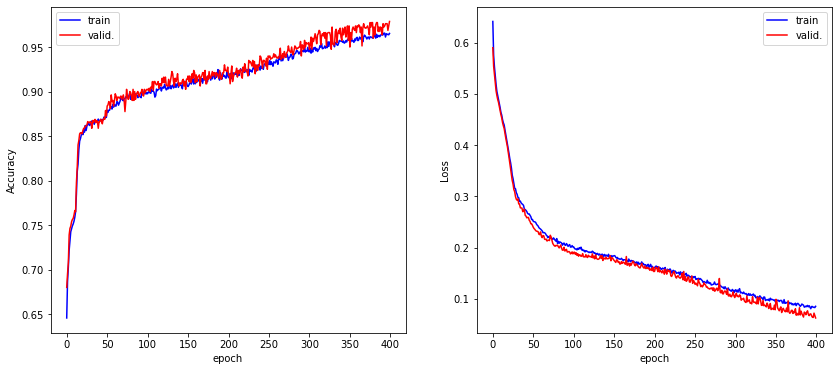

In [18]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history.history['accuracy'],label="train",c="b")
ax.plot(history.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history.history['loss'],label="train",c="b")
ax.plot(history.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

## Ex.2 Change the number of sample 

### Reduced number of sample

In [19]:
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')

red_val=0.6
(x, y) = (x[:int(red_val*len(x))], y[:int(red_val*len(x))])

N=len(x)
perc_train=0.8
N_train = int(N*perc_train)

(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 1920 	 Validation: 480


In [20]:
#optimization
nepochs=400
model_reduced = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

In [21]:
history_reduced = model_reduced.fit(x_train, y_train,
                                    epochs = nepochs,
                                    batch_size = grid_result.best_params_['batch_size'],
                                    validation_data=(x_valid,y_valid),
                                    verbose=1)

Epoch 1/400
192/192 [==============================] - 1s 2ms/step - loss: 0.7883 - accuracy: 0.5437 - val_loss: 0.6662 - val_accuracy: 0.5708
Epoch 2/400
192/192 [==============================] - 0s 2ms/step - loss: 0.7175 - accuracy: 0.5448 - val_loss: 0.6578 - val_accuracy: 0.5875
Epoch 3/400
192/192 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5667 - val_loss: 0.6561 - val_accuracy: 0.5708
Epoch 4/400
192/192 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.6026 - val_loss: 0.6628 - val_accuracy: 0.5833
Epoch 5/400
192/192 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.6047 - val_loss: 0.6475 - val_accuracy: 0.6000
Epoch 6/400
192/192 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.6307 - val_loss: 0.6456 - val_accuracy: 0.6167
Epoch 7/400
192/192 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6255 - val_loss: 0.6372 - val_accuracy: 0.6167

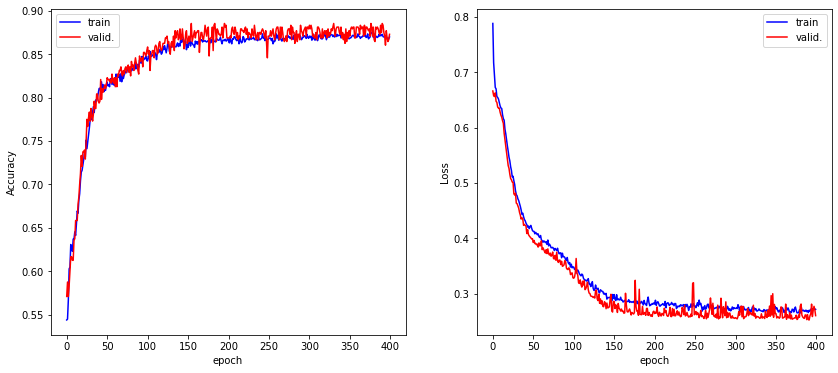

In [22]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_reduced.history['accuracy'],label="train",c="b")
ax.plot(history_reduced.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_reduced.history['loss'],label="train",c="b")
ax.plot(history_reduced.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

### Increased number of sample

In [29]:
x = np.loadtxt(filename("data_increased",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels_increased",TYPE), delimiter=' ')

N=len(x)
perc_train=0.8
N_train = int(N*perc_train)

(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 4800 	 Validation: 1200


In [30]:
#optimization
nepochs=400
model_increased = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

In [31]:
history_increased = model_increased.fit(x_train, y_train,
                                    epochs = nepochs,
                                    batch_size = grid_result.best_params_['batch_size'],
                                    validation_data=(x_valid,y_valid),
                                    verbose=1)

Epoch 1/400
480/480 [==============================] - 1s 1ms/step - loss: 0.7161 - accuracy: 0.6025 - val_loss: 0.6299 - val_accuracy: 0.6292
Epoch 2/400
480/480 [==============================] - 1s 1ms/step - loss: 0.6402 - accuracy: 0.6333 - val_loss: 0.6163 - val_accuracy: 0.6400
Epoch 3/400
480/480 [==============================] - 1s 1ms/step - loss: 0.6177 - accuracy: 0.6446 - val_loss: 0.6062 - val_accuracy: 0.6542
Epoch 4/400
480/480 [==============================] - 1s 1ms/step - loss: 0.6123 - accuracy: 0.6569 - val_loss: 0.5989 - val_accuracy: 0.6692
Epoch 5/400
480/480 [==============================] - 1s 1ms/step - loss: 0.6038 - accuracy: 0.6665 - val_loss: 0.5899 - val_accuracy: 0.6792
Epoch 6/400
480/480 [==============================] - 1s 1ms/step - loss: 0.5977 - accuracy: 0.6746 - val_loss: 0.5893 - val_accuracy: 0.6825
Epoch 7/400
480/480 [==============================] - 1s 1ms/step - loss: 0.5933 - accuracy: 0.6758 - val_loss: 0.5836 - val_accuracy: 0.6817

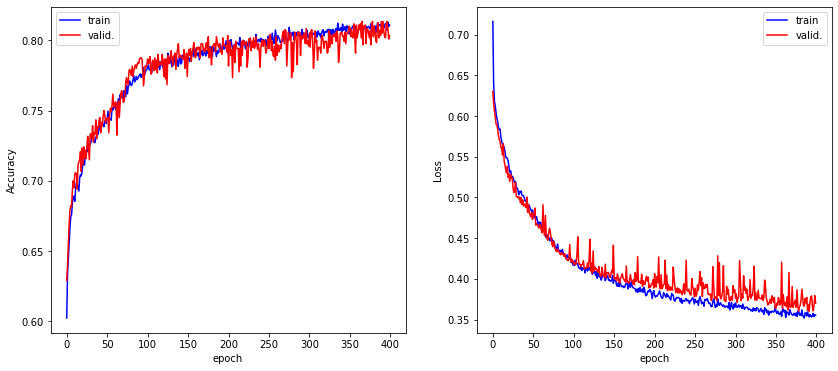

In [32]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_increased.history['accuracy'],label="train",c="b")
ax.plot(history_increased.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_increased.history['loss'],label="train",c="b")
ax.plot(history_increased.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

### Augmented number of sample

In [23]:
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')

N=len(xT)
perc_train=0.8
N_train = int(N*perc_train)

(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_aug = x_train + np.random.normal(0, 0.05, size=x_train.shape)
y_aug = np.copy(y_train)

x_train = np.vstack((x_train, x_aug))
y_train = np.hstack((y_train, y_aug))

Train: 6400 	 Validation: 1600


In [57]:
#optimization
nepochs=400

model_augmented = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

In [25]:
history_augmented = model_reduced.fit(x_train, y_train,
                                      epochs = nepochs,
                                      batch_size = grid_result.best_params_['batch_size'],
                                      validation_data=(x_valid,y_valid),
                                      verbose=1)

Epoch 1/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2689 - accuracy: 0.8728 - val_loss: 0.2718 - val_accuracy: 0.8687
Epoch 2/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2700 - accuracy: 0.8706 - val_loss: 0.2641 - val_accuracy: 0.8737
Epoch 3/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2694 - accuracy: 0.8714 - val_loss: 0.2631 - val_accuracy: 0.8744
Epoch 4/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2698 - accuracy: 0.8708 - val_loss: 0.2627 - val_accuracy: 0.8750
Epoch 5/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2713 - accuracy: 0.8702 - val_loss: 0.2685 - val_accuracy: 0.8694
Epoch 6/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2679 - accuracy: 0.8716 - val_loss: 0.2730 - val_accuracy: 0.8681
Epoch 7/400
640/640 [==============================] - 1s 1ms/step - loss: 0.2660 - accuracy: 0.8727 - val_loss: 0.2630 - val_accuracy: 0.8725

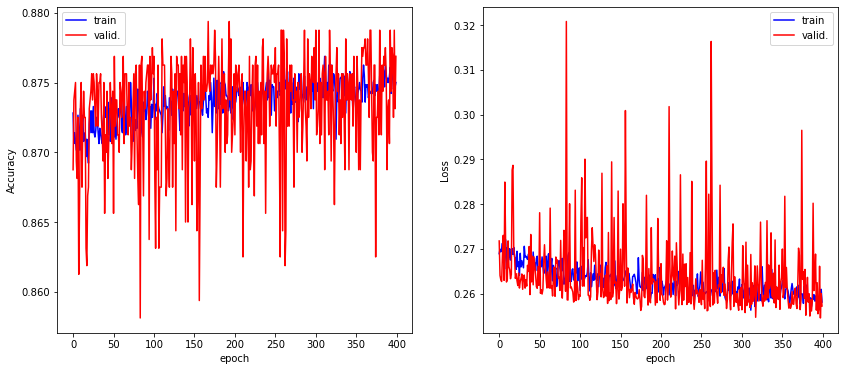

In [26]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_augmented.history['accuracy'],label="train",c="b")
ax.plot(history_augmented.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_augmented.history['loss'],label="train",c="b")
ax.plot(history_augmented.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

## Ex.3 Non linearly seperable data

In [33]:
TYPE = 2

x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(f'Dimension of a sample{L}')

#training percentage
perc_train = 0.8


N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

Dimension of a sample2
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

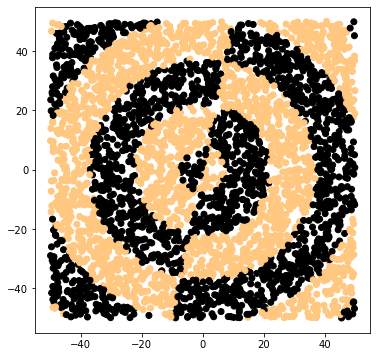

In [37]:
plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [34]:
nepochs=400

model = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

In [35]:
history = model.fit(x_train, y_train,
                    epochs = nepochs,
                    batch_size = grid_result.best_params_['batch_size'],
                    validation_data=(x_valid,y_valid),
                    verbose=2)

Epoch 1/400
480/480 - 1s - loss: 0.6215 - accuracy: 0.6650 - val_loss: 0.5879 - val_accuracy: 0.6817 - 777ms/epoch - 2ms/step
Epoch 2/400
480/480 - 0s - loss: 0.5819 - accuracy: 0.7077 - val_loss: 0.5617 - val_accuracy: 0.7075 - 485ms/epoch - 1ms/step
Epoch 3/400
480/480 - 1s - loss: 0.5536 - accuracy: 0.7219 - val_loss: 0.5450 - val_accuracy: 0.7275 - 517ms/epoch - 1ms/step
Epoch 4/400
480/480 - 0s - loss: 0.5392 - accuracy: 0.7285 - val_loss: 0.5301 - val_accuracy: 0.7158 - 455ms/epoch - 947us/step
Epoch 5/400
480/480 - 0s - loss: 0.5289 - accuracy: 0.7331 - val_loss: 0.5151 - val_accuracy: 0.7267 - 438ms/epoch - 913us/step
Epoch 6/400
480/480 - 0s - loss: 0.5213 - accuracy: 0.7352 - val_loss: 0.5075 - val_accuracy: 0.7433 - 432ms/epoch - 901us/step
Epoch 7/400
480/480 - 0s - loss: 0.5152 - accuracy: 0.7365 - val_loss: 0.5043 - val_accuracy: 0.7367 - 470ms/epoch - 979us/step
Epoch 8/400
480/480 - 0s - loss: 0.5050 - accuracy: 0.7448 - val_loss: 0.4923 - val_accuracy: 0.7525 - 464ms/e

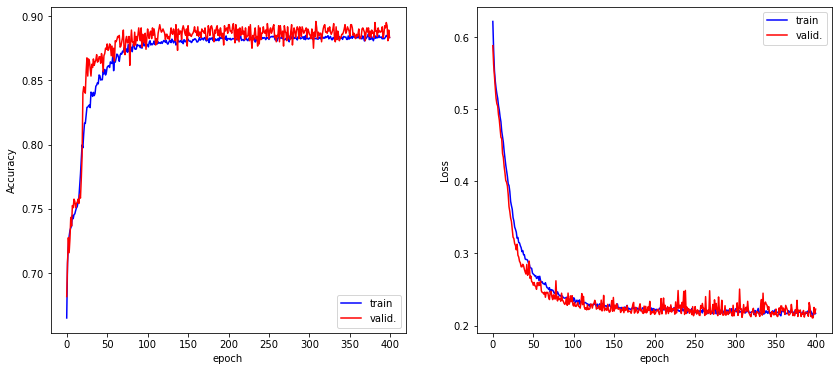

In [36]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history.history['accuracy'],label="train",c="b")
ax.plot(history.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history.history['loss'],label="train",c="b")
ax.plot(history.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()